In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
excel_data=pd.ExcelFile("/home/jian/Projects/Big_Lots/Analysis/2018_Q4/Post_YoY/plotting/Excel_BL_2018_Q4_post_YoY_small_JL_2019-03-04.xlsx")

In [3]:
df_breakeven=excel_data.parse('BreakEven_For_Quad II_Quad III')
df_breakeven=df_breakeven[['location_id','Quadrant','Actual_YoY_Missing','BreakEven_RewardsShoppers','BreakEven_RewardsTrans','BreakEven_NonRewardsTrans']]
# df_breakeven['Actual_YoY_Missing']=-df_breakeven['Actual_YoY_Missing']
df_breakeven_Quad_II=df_breakeven[df_breakeven['Quadrant']=="Quadrant II"]

In [4]:
df_breakeven_Quad_II['Bin']=np.where((df_breakeven_Quad_II['Actual_YoY_Missing']>=-5000) & (df_breakeven_Quad_II['Actual_YoY_Missing']<0),"[-5000,0)",
                                     np.where((df_breakeven_Quad_II['Actual_YoY_Missing']>=-10000) & (df_breakeven_Quad_II['Actual_YoY_Missing']<-5000),"[-10000,-5000)",
                                              np.where((df_breakeven_Quad_II['Actual_YoY_Missing']>=-20000) & (df_breakeven_Quad_II['Actual_YoY_Missing']<-10000),"[-200000,-10000)",
                                                       np.where((df_breakeven_Quad_II['Actual_YoY_Missing']>=-50000) & (df_breakeven_Quad_II['Actual_YoY_Missing']<-20000),"[-500000,-20000)",
                                                                np.where((df_breakeven_Quad_II['Actual_YoY_Missing']>=-100000) & (df_breakeven_Quad_II['Actual_YoY_Missing']<-50000),"[-100000,-50000)",
                                                                         "<-100000")
                                                                       )
                                                              )
                                                     )
                                            )
                                    

df_breakeven_Quad_II['cat_order']=np.where((df_breakeven_Quad_II['Actual_YoY_Missing']>=-5000) & (df_breakeven_Quad_II['Actual_YoY_Missing']<0),6,
                                           np.where((df_breakeven_Quad_II['Actual_YoY_Missing']>=-10000) & (df_breakeven_Quad_II['Actual_YoY_Missing']<-5000),5,
                                                    np.where((df_breakeven_Quad_II['Actual_YoY_Missing']>=-20000) & (df_breakeven_Quad_II['Actual_YoY_Missing']<-10000),4,
                                                             np.where((df_breakeven_Quad_II['Actual_YoY_Missing']>=-50000) & (df_breakeven_Quad_II['Actual_YoY_Missing']<-20000),3,
                                                                      np.where((df_breakeven_Quad_II['Actual_YoY_Missing']>=-100000) & (df_breakeven_Quad_II['Actual_YoY_Missing']<-50000),2,
                                                                               1)
                                                                     )
                                                              )
                                                     )
                                            )
                                    

df_breakeven_Quad_II=df_breakeven_Quad_II.sort_values("cat_order")



/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [5]:
df_breakeven_Quad_II["BreakEven_RewardsShoppers"].max()

4555.6040055467975

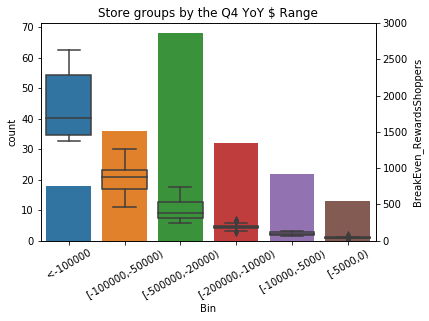

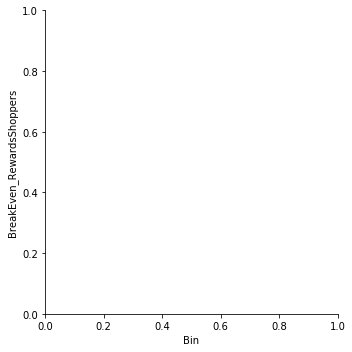

In [6]:
fig, ax_main = plt.subplots(nrows=1, ncols=1, sharex=True)
plt.xticks(rotation=30,fontsize=10)

ax_main.set_title('Store groups by the Q4 YoY $ Range')
sns.countplot(x="Bin", data=df_breakeven_Quad_II, ax=ax_main)

ax_secondary = ax_main.twinx()
ax_secondary.set(xlabel='YoY_Sales_Range', ylabel='Shoppers needed to break-even')
ax_secondary.set_ylim([0, 3000])
sns.catplot(x="Bin", y="BreakEven_RewardsShoppers", kind="box", data=df_breakeven_Quad_II, ax=ax_secondary)                                                             

fig.savefig("output.png")


TypeError: __init__() got an unexpected keyword argument 'clear'

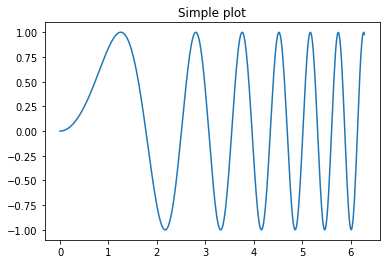

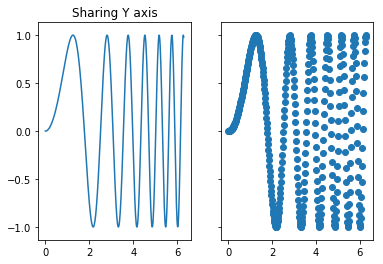

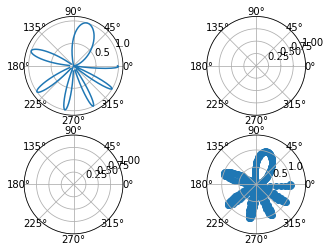

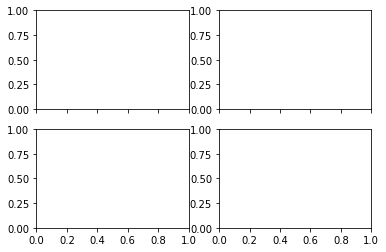

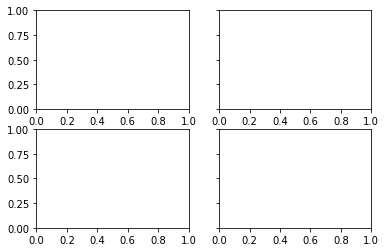

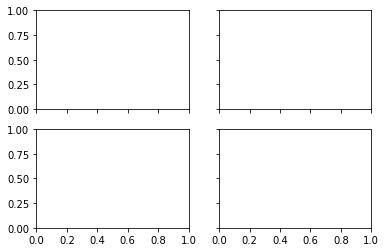

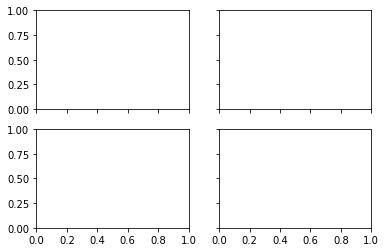

In [163]:
#First create some toy data:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)

#Creates just a figure and only one subplot
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')

#Creates two subplots and unpacks the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)

#Creates four polar axes, and accesses them through the returned array
fig, axes = plt.subplots(2, 2, subplot_kw=dict(polar=True))
axes[0, 0].plot(x, y)
axes[1, 1].scatter(x, y)

#Share a X axis with each column of subplots
plt.subplots(2, 2, sharex='col')

#Share a Y axis with each row of subplots
plt.subplots(2, 2, sharey='row')

#Share both X and Y axes with all subplots
plt.subplots(2, 2, sharex='all', sharey='all')

#Note that this is the same as
plt.subplots(2, 2, sharex=True, sharey=True)

#Creates figure number 10 with a single subplot
#and clears it if it already exists.
fig, ax=plt.subplots(num=10, clear=True)

In [53]:
len(data)

189